<a href="https://colab.research.google.com/github/leslie-zi-pan/kaggle-courses/blob/main/ryanluoli2_notebooks/A_Complete_Guide_to_Naive_Bayes_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Complete Guide to Naive Bayes Classifiers

Notebook Source:
https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-naive-bayes-classifiers

## Data Import and Modules

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
! pip install kaggle
! rm -rf ~/.kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle competitions download -c titanic -p titanic-dataset --force
!kaggle datasets download -d uciml/sms-spam-collection-dataset -p spam-dataset --force
!unzip -o titanic-dataset/titanic -d titanic-dataset
!unzip -o spam-dataset/sms-spam-collection-dataset -d spam-dataset

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 22.7MB/s]
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 58.4MB/s]
Archive:  titanic-dataset/titanic.zip
  inflating: titanic-dataset/gender_submission.csv  
  inflating: titanic-dataset/test.csv  
  inflating: titanic-dataset/train.csv  
Archive:  spam-dataset/sms-spam-collection-dataset.zip
  inflating: spam-dataset/spam.csv   


## Imports

In [4]:
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

print('Setup Complete')

Setup Complete


## Introduction


**What is Naive Bayes Classifier?**

Naive Bayes Classifier is a classifier based on the Bayes' theorem and the class-conditional independence assumption. 

The algorithms success in solving problems such as natural language processing (NLP) problems is a reason for its wide adoption including in spam email filtering applications.




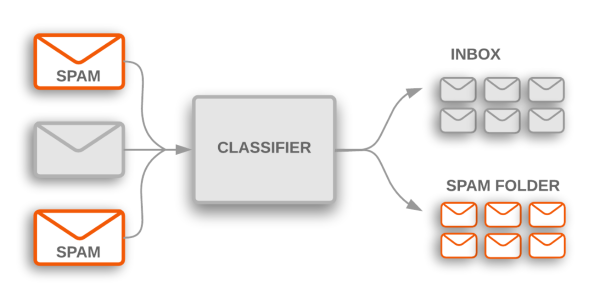

**How does a Naive Bayes Classifier work?**
Models such as Logistic Regression learn the probability of getting specific classes of output Y given X features using functions like sigmoid function. These are discriminative learning algorithms.

Naive Bayes Classifier, on the other hand, is a generative learning algorithm. It learns what the input features X are like for a given class of output Y. 

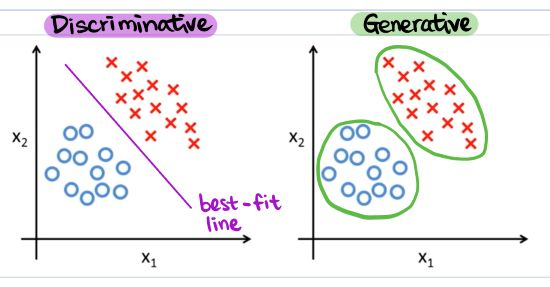

Discriminative algorithm will try to separate the datapoints of different classes using a line boundary, whereas generative algorithms like naive bayes classifier will do the opposite. 

We can formulate this with:

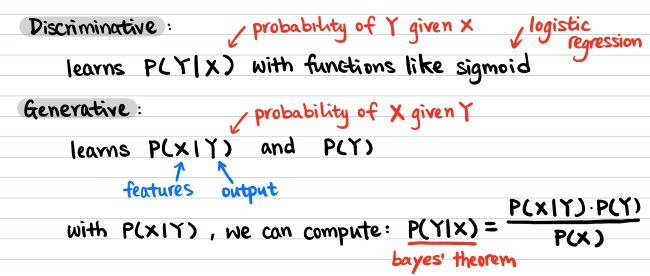

Naive bayes classifier will first learn the probability that a set of input variables X will occur given a class of output variable Y that is P(X|Y). IT then computes the desired probability P(Y|X) through the bayes' theorem. 

## How does it apply the Bayes' Theorem?

**Bayes Theorem**

Bayes Theorem states that the probability of getting Y (output vairble) equals to specific class given a specific set of X (input variables) can be computed as the following:

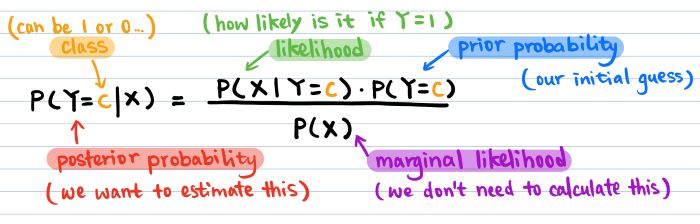

In the above formula, the posterior probability is the desired output. It is called posterior because it is the adjusted probability calculated based on our initial guess P(Y=c), i.e. the percentage of the class within the training data. According to the theorem, this posterior probability is directly proportional to the product of the likelihood and prior probability. 

The marginal likelihood does not need to be calculated because it is a common demoninator for all the probabilities P(Y=c|X) and therefore can be ignored. (we only need to compare numerators)

However, there is a big problem with finding the likelihood P(X|Y=c): with many input variables X (X1, X2, X3...), there will be a huge number of combinations which makes the calculation of the likelihood nearly impossible. How does the naive bayes classifier deal with this?

**The Class-Conditional Independence Assumption**

To find the posterior probability P(X|Y=c), we need to make a big assumption first. This is also the key assumption made by naive bayes classifier: the class-conditional independence assumption. 

Class- conditional independence assumes that the overall likelihood P(X1, X2, X3...| Y) is equal to the product of individual likelihoods. In other words, it assumes no relationships among the input variables:

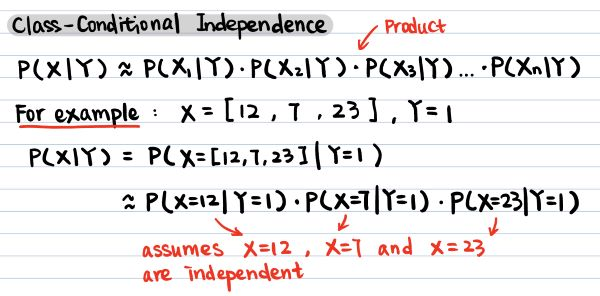

This assumption reduces the variance of the naive bayes classifier in the cost of an additional bias. For example, in NLP, there are always relationships among the words that form a sentence. Therefore, the assumption will introduce a bias that lower the classification performance because of the omitted relationships. 

At the mean time, the assumption also decrease the variance of the model. Without the assumption, a large training dataset will be needed to find the likelihood and therefore making the model highly dependent on the trining data. 

How do we actually calculate theses probabilities when given a training dataset?

**Multinomial Naive Bayes Classifier**

In general, there are 2 different ways to calculate the probabilities needed for the bayes' theorem:
- Discrete variables: find the frequencies
- Continuous variables: use a guassian curve

When the input variables are discrete (e.g. words in an email), we can directly use the frequency of a specific event happening within the training data as our probabilities. This type of naive bayes classifier is called the Multinomial Naive Bayes Classifier. 

Lets have a look at a spam email classification:

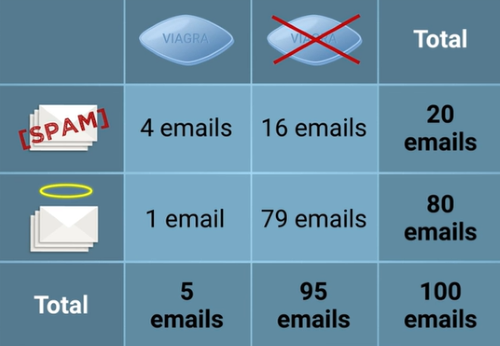

Here, we are trying to classify spam and non-spam emails depending on whether they contain the word viagra. From teh above table, we can compute the probabilities as:
- Likelihood P(X=viagra|Y=spam) = 4/20 = 0.2
- Likelihood of other words calculated in similar manner
- Prior probability P(Y=spam) = 20/100  0.2

Then, we find the product of the individual likelihoods as our overall likelihood under the class-conditional independence assumption. Finally, the posterior probability is directly proportional to the product of the overall likelihood and the priori probability. 

This posterior probability we calculated corresponds to the class of spam emails. We can do the same for the class of non-spam emails. We then compare the posterior probabilities of the 2 classes and go for the higher one. 

**Why all these troubles?**

Looking at the above table, some may ask why don't we just find the individual posterior probabilities and calculate the product to get the final result instead of going through the calculations of the bayes' theorem?

Example below shows why the assumption can only be applied to the likelihood but not the posterior probability:

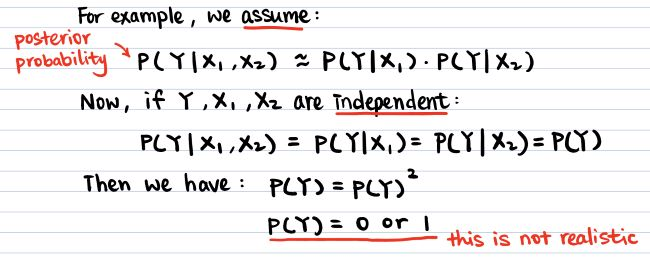

The assumption will result in a non-realistic result and therefore cannot be applied to the posterior probability directly. 

**Guassian Naive Bayes Classifier**

Guassian naive bayes classifier makes an additional assumption: it assumes that each of the input variable follows a normal distribution. Therefore, the classifier finds the likelihood using a guassian curve (the probability curve for a normal distribution) instead of calculating frequencies. 

Example for classifying gender using age:

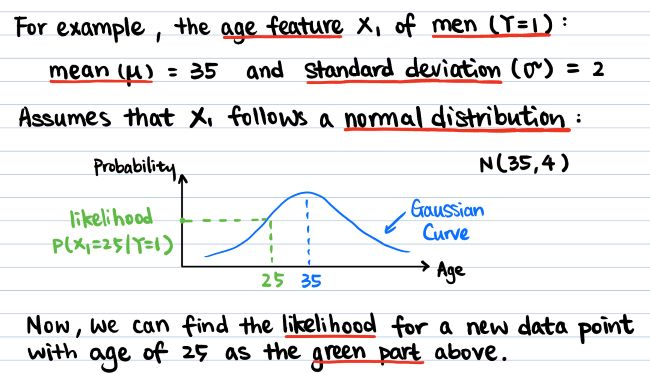

With the mean and stadard deviation, we can draw a guassian curve for the age feature. Then the likelihood of having a specific age given the new data point represents a male can be found using the curve as demonstrated above. 

Similar to the multinomial naive bayes classifier, the gaussian naive bayes classifier first calculates the individual likelihood. Then, it computes the overall likelihood by applying the class-conditional independence assumption. Finally, it finds the posterior probability for each class and compare them to reach a classification result. 

## Eample: SMS Spam Filtering

### Import data

In [5]:
df_spam = pd.read_csv('/content/spam-dataset/spam.csv', encoding='latin-1')
df_spam.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocess


In [37]:
# Remove stop words and transform the texts into the vectorised input variables X
vectoriser = CountVectorizer(stop_words='english')
X = vectoriser.fit_transform(df_spam['v2'])

# Transform the values of the output variable into 0 and 1
y = df_spam['v1'].map({'spam': 1, 'ham': 0})

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Multinomial Naive Bayes Classifier**

The multinomial NB classifier has a hyperparameter called alpha. It is the smoothing parameter to avoid zero counts when calculating the frequencies. 

E.g. if we are classifying a new SMS with a word 'ryan' which never exist in the spam emails within out training dataset, the likelihood for this word will be zero. This will cause the overall likelihood to be zero (due to product of individual ikelihoods) for no matter what class of output variable we have. 

Therefore, we need to add additional counts to each word when calculating the frequencies to avoid having a zero likelihood value. Alpha indicates how many additional counts we add. 

### Model train and predict

In [38]:
# Train and evaluate models with different alpha values
alpha_values = np.arange(0.01, 10, 0.01)
accuracy_scores, recall_scores, precision_scores = [], [], []

for alpha in alpha_values:
  NB = MultinomialNB(alpha=alpha)
  NB.fit(X_train, y_train)
  y_pred = NB.predict(X_test)
  accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
  recall_scores.append(metrics.recall_score(y_test, y_pred))
  precision_scores.append(metrics.precision_score(y_test, y_pred))

performance_NB = pd.DataFrame(columns=['alpha', 'accuracy', 'recall', 'precision'])
performance_NB['alpha'] = alpha_values
performance_NB['accuracy'] = accuracy_scores
performance_NB['recall'] = recall_scores
performance_NB['precision'] = precision_scores
performance_NB.head(5)

,alpha,accuracy,recall,precision
0,0.01,0.980263,0.953782,0.911647
1,0.02,0.980263,0.962185,0.905138
2,0.03,0.980861,0.962185,0.908730
3,0.04,0.980861,0.962185,0.908730
4,0.05,0.980861,0.966387,0.905512


In [39]:
# Fine the best alpha
best_index = performance_NB['accuracy'].idxmax()
performance_NB.iloc[best_index, :]

alpha        3.800000
accuracy     0.983852
recall       0.911765
precision    0.973094
Name: 379, dtype: float64

## Example: Titanic Survival Prediction

### Import data

In [146]:
df_train = pd.read_csv('/content/titanic-dataset/train.csv')
df_test = pd.read_csv('/content/titanic-dataset/test.csv')


In [147]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [148]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Preprocess

In [153]:
# Make int and group by age
df_engineer = df_train[['Age', 'Survived']]
df_engineer['Age'].fillna(round(df_engineer['Age'].dropna().mean()), inplace=True)
df_engineer['Age'] = df_engineer.apply(lambda x: int(x.Age), axis=1)
df_engineer['AgeFrequency'] =  df_engineer.apply(lambda row: len(df_engineer.loc[df_engineer['Age'] == row['Age']]), axis=1)
# df_engineer['']
df_engineer = pd.DataFrame({
    'Age': df_engineer['Age'],
    'AgeFrequency': df_engineer['AgeFrequency'],
    'SurvivedCount' : df_engineer.groupby(['Age'])['Survived'].transform(np.sum),
    'SurvivedCountRate': df_engineer.groupby(['Age'])['Survived'].transform(np.sum) / df_engineer['AgeFrequency']
})
df_engineer

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,Age,AgeFrequency,SurvivedCount,SurvivedCountRate
0,22,27,11,0.407407
1,38,11,5,0.454545
2,26,18,6,0.333333
3,35,18,11,0.611111
4,35,18,11,0.611111
...,...,...,...,...
886,27,18,11,0.611111
887,19,25,9,0.360000
888,30,204,62,0.303922
889,26,18,6,0.333333


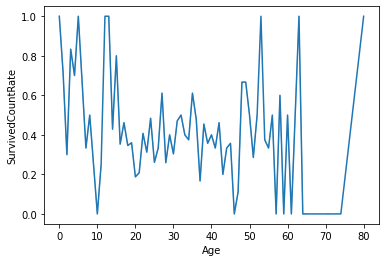

In [154]:
import seaborn as sns
sns.lineplot(data=df_engineer, x="Age", y="SurvivedCountRate")

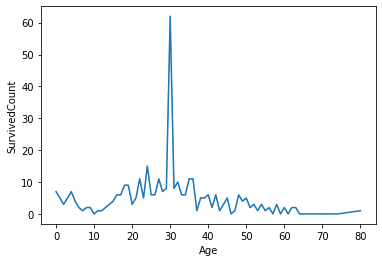

In [155]:
sns.lineplot(data=df_engineer, x="Age", y="SurvivedCount")

In [156]:
# Missing Values
df_train = df_train.dropna(subset=['Embarked'])
df_train['Age'].fillna(round(df_train['Age'].dropna().mean()), inplace=True)
df_test['Age'].fillna(round(df_test['Age'].dropna().mean()), inplace=True)

# Feature engineering: family size
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1
df_train['Alone'] = df_train['FamilySize'].map({1:1})
df_train['Alone'].fillna(0, inplace=True)
df_test['Alone'] = df_test['FamilySize'].map({1:1})
df_test['Alone'].fillna(0, inplace=True)

# Feature Engineering: Age band
bins = [0, 15, 30, 60, 81]
labels = [0, 1, 2, 3]
df_train['AgeBand'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['AgeBand'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

# Feature Engineering: Fare band
bins = [0, 8, 14, 31, 513]
labels = [0, 1, 2, 3]
df_train['FareBand'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)
df_test['FareBand'] = pd.cut(df_test['Age'], bins=bins, labels=labels, right=False)

# Encode Categorical Variables
df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1, 'female':0})
df_train = pd.get_dummies(df_train, columns=['Embarked'])
df_test = pd.get_dummies(df_test, columns=['Embarked'])
df_train.drop(columns=['Embarked_S'], inplace=True)
df_test.drop(columns=['Embarked_S'], inplace=True)

# Create datasets for modelling
X_train = df_train.drop(columns=['Survived','Name','Age','SibSp','Parch','Fare','PassengerId','Ticket','Cabin'])
y_train = df_train['Survived']
X_test = df_test.drop(columns=['Name','Age','SibSp','Parch','Fare','Ticket','Cabin']).copy()

# Create the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

**Gaussian Naive Bayes Classifier**

There is one hyperparamter we need to tune var_smoothing. This is the portion of the largest variance of all features that is added to variances for calculation stability. 

In [157]:
# Train models with different smoothing values
smooth_values = np.linspace(1e-9, 1e-2, 1000)
accuracy_scores, recall_scores, precision_scores = [], [], []

for smooth in smooth_values:
  GNB = GaussianNB(var_smoothing=smooth)
  GNB.fit(X_train, y_train)
  y_pred = GNB.predict(X_valid)

  accuracy_scores.append(metrics.accuracy_score(y_valid, y_pred))
  recall_scores.append(metrics.recall_score(y_valid, y_pred))
  precision_scores.append(metrics.precision_score(y_valid, y_pred))

performance_GNB = pd.DataFrame(columns=['smooth', 'accuracy', 'recall', 'precision'])
performance_GNB['smooth'] = smooth_values
performance_GNB['accuracy'] = accuracy_scores
performance_GNB['recall'] = recall_scores
performance_GNB['precision'] = precision_scores
performance_GNB.head()

,smooth,accuracy,recall,precision
0,1.000000e-09,0.779026,0.763636,0.717949
1,1.001101e-05,0.779026,0.763636,0.717949
2,2.002102e-05,0.779026,0.763636,0.717949
3,3.003103e-05,0.779026,0.763636,0.717949
4,4.004104e-05,0.779026,0.763636,0.717949


In [158]:
# Finds the best smoothing value
best_index = performance_GNB['accuracy'].idxmax()
performance_GNB.iloc[best_index, :]

smooth       0.003554
accuracy     0.790262
recall       0.754545
precision    0.741071
Name: 355, dtype: float64